# **Exercise #1**

Consider the **3R planar robot** in the configuration $q$ shown in **Figure 1**, controlled by the joint velocity $\dot{q} \in \mathbb{R}^3$.

---

## **Problem Statement**
A desired Cartesian velocity $v_e \in \mathbb{R}^2$ should be imposed on the **end-effector point** $P_e$ of the robot $\mathcal{R}$, while **maximizing** the distance function $H_{\text{dist}}(q)$ between the robot body (i.e., its kinematic skeleton) and a **circular obstacle** $\mathcal{O}$.

The obstacle is **centered at** $C = (0,2)$ and has a **radius** $r = 0.5$ m. The distance function is expressed as:

$$
H_{\text{dist}}(q) = \min_{p \in \mathcal{R}, o \in \mathcal{O}} \| p(q) - o \| = \| P_m(q) - O_m \|
$$

where:
- $P_m(q)$ is the **closest point on the robot** to the obstacle.
- $O_m$ is the **closest point on the obstacle**.

---

## **Tasks**
1. **Determine the symbolic expression** and **compute the numerical value** of the velocity command $\dot{q}_{PG}$ according to the **Projected Gradient (PG) method** when:

   $$
   v_e =
   \begin{bmatrix} 0 \\ 1 \end{bmatrix} \text{m/s}
   $$

2. **Verify your result** and compute the **resulting velocity** $v_m \in \mathbb{R}^2$ of the closest point $P_m$.

---

## **Figure 1: The 3R Planar Robot with a Circular Obstacle**
![3R Planar Robot with Obstacle](link-to-image.png)  <!-- Replace with actual image link -->


The forward kinematics equations are:


The position of the end effector P_e is:


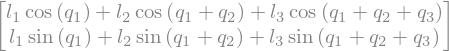

The Jacobian has rank 2 and is:


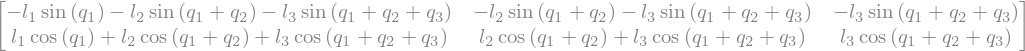

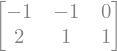

The joint velocities needed to achieve the desired end effector velocity are:


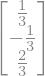

The pseudo-inverse of the Jacobian is:


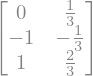

The null-space projector N is:


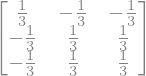

The position of the closest point P_m is:


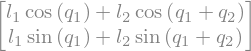

The position of the closest point O_m on the obstacle is:


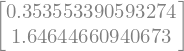

The distance function H_dist(q) is:


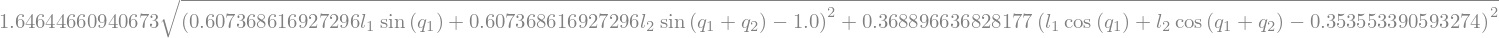

The gradient of the distance function w.r.t. joint angles (∇H) is:


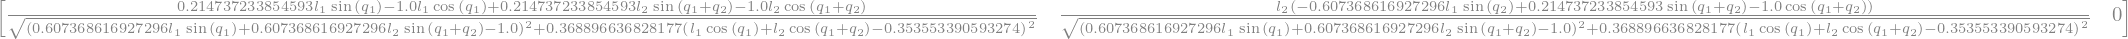

The projected gradient term q_dot_pg is:


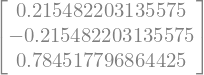

The resulting velocity of the closest point P_m is:


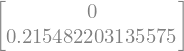

In [148]:
from sympy import symbols, cos, sin, Matrix, pi, sqrt, simplify, evalf
import sympy as sp
from IPython.display import display, Math
sp.init_printing(use_latex=True)

# Define symbols and constants
q_1, q_2, q_3, l_1, l_2, l_3, r, x_c, y_c = symbols('q_1 q_2 q_3 l_1 l_2 l_3 r x_c y_c', real=True, positive=True)
subs_dict = {l_1: 1, l_2: 1, l_3: 1, q_1: 0, q_2: pi/2, q_3: -pi/2, r: 0.5, x_c: 0, y_c: 2}

# Define desired end effector velocity (primary task)
v_e = Matrix([0, 1])

# Forward kinematics equations
x_e = l_1 * cos(q_1) + l_2 * cos(q_1 + q_2) + l_3 * cos(q_1 + q_2 + q_3)
y_e = l_1 * sin(q_1) + l_2 * sin(q_1 + q_2) + l_3 * sin(q_1 + q_2 + q_3)
print("The forward kinematics equations are:")
display(x_e, y_e)

# Compute the position of the end effector P_e
P_e = Matrix([x_e, y_e])
print("The position of the end effector P_e is:")
display(P_e)

# Compute the Jacobian and its rank
J = P_e.jacobian([q_1, q_2, q_3])
J_num = J.subs(subs_dict)
print(f"The Jacobian has rank {J.rank()} and is:")
display(J)
display(J_num)

# Compute the needed joint velocities to achieve the desired end effector velocity
J_pinv = J_num.pinv()
q_dot = J_pinv * v_e
print("The joint velocities needed to achieve the desired end effector velocity are:")
display(q_dot)

# Compute the pseudo-inverse of the Jacobian
print("The pseudo-inverse of the Jacobian is:")
display(J_pinv)

# Compute the null-space projector N = I - J^+ J
N = sp.eye(3) - J_pinv * J_num
print("The null-space projector N is:")
display(N)

C = Matrix([x_c, y_c])

# Define the closest point P_m(q) on the robot, i.e. the second link endpoint
x_m = l_1 * cos(q_1) + l_2 * cos(q_1 + q_2)
y_m = l_1 * sin(q_1) + l_2 * sin(q_1 + q_2)
P_m = Matrix([x_m, y_m])
print("The position of the closest point P_m is:")
display(P_m)

# Compute the closest point on the obstacle (perpendicular projection)
O_m = C + r * (P_m - C) / (P_m - C).norm()
O_m = simplify(O_m.subs(subs_dict))
O_m = O_m.evalf()
print("The position of the closest point O_m on the obstacle is:")
display(O_m)

from sympy import expand

# Distance function H_dist(q) = || P_m - O_m ||
H_dist = (P_m - O_m).norm()
H_dist = simplify(H_dist)
print("The distance function H_dist(q) is:")
display(H_dist)

# Compute the gradient of the distance function w.r.t. joint angles (∇H)
grad_H = Matrix([H_dist]).jacobian([q_1, q_2, q_3])
grad_H = simplify(grad_H)
print("The gradient of the distance function w.r.t. joint angles (∇H) is:")
display(grad_H)

# Compute projected gradient term (null-space velocity optimization)
alpha = 0.5  # Step-size coefficient
q_dot_pg = q_dot + alpha * N * grad_H.T
q_dot_pg = q_dot_pg.subs(subs_dict)
q_dot_pg = simplify(q_dot_pg)
print("The projected gradient term q_dot_pg is:")
display(q_dot_pg)

# Compute the resulting velocity of the closest point P_m
J_m = P_m.jacobian([q_1, q_2, q_3])
v_m = J_m * q_dot_pg.subs(subs_dict)
v_m = v_m.subs(subs_dict)
v_m = simplify(v_m)
print("The resulting velocity of the closest point P_m is:")
display(v_m)


The distance function H_dist(q) is:


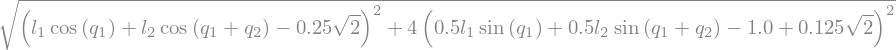

The gradient of the distance function w.r.t. joint angles (∇H) is:


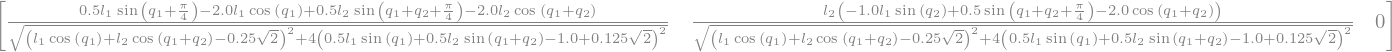

The projected gradient term q_dot_pg is:


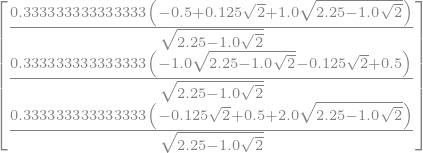

The resulting velocity of the closest point P_m is:


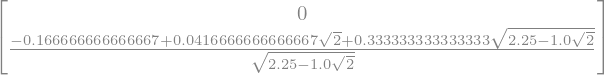

The Jacobian J(q) and numerical values at q1 = π/4, q2 = π/2 are:


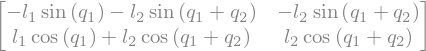

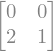


The pseudoinverse J+ and numerical values at q1 = π/4, q2 = π/2 are:


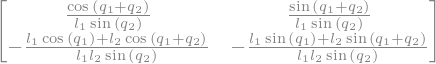

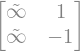


The null space projection matrix N is:


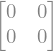

In [112]:
import sympy as sp
from sympy import cos, sin, pi, simplify, symbols, Matrix
from IPython.display import display

# Given parameters
l1, l2 = symbols('l1 l2', real=True, positive=True)  # Link lengths
q1, q2 = symbols('q1 q2', real=True)  # Joint angles

# Substitution dictionary for numerical values
subs_dict = {q1: 0, q2: 0, l1: 1, l2: 1}

# Compute Forward Kinematics (End-effector position)
xe = l1 * cos(q1) + l2 * cos(q1 + q2)
ye = l1 * sin(q1) + l2 * sin(q1 + q2)

# Compute the Jacobian
J = Matrix([xe, ye]).jacobian([q1, q2])
print("The Jacobian J(q) and numerical values at q1 = π/4, q2 = π/2 are:")
display(J)
display(J.subs(subs_dict))

# Compute the pseudo-inverse symbolically
J_pseudo_inv = J.pinv()
J_pseudo_inv = simplify(J_pseudo_inv)  # Simplify expression
print("\nThe pseudoinverse J+ and numerical values at q1 = π/4, q2 = π/2 are:")
display(J_pseudo_inv)
display(J_pseudo_inv.subs(subs_dict))


# Compte the null space projection matrix N = I - J^+ J
N = sp.eye(2) - J_pseudo_inv * J
N = simplify(N)  # Simplify expression
print("\nThe null space projection matrix N is:")
display(N)
